<a href="https://colab.research.google.com/github/omaatheus/exercise-time-analysis/blob/main/TIADataset_BossFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explicação do Dataset**

O *Exercise Dataset* tem informações sobre as medições de pulso de pessoas após distintos tipos de exercícios. O motivo principal deste dataset é analisar as variações na frequência de pulso em função de fatores como tipo de tempo, dieta após o exercício e tipo de atividade física realizada. Esse conjunto de dados é útil para estudos de séries temporais e análises simples de comportamento do pulso, mesmo que seja limitado em escopo por focar apenas nas medições de pulso e apresentar um tamanho reduzido.

**Vantagens:**
- Estrutura simples e fácil de interpretar.
- Ideal para análises de séries temporais, como a variação do pulso ao longo do tempo após o exercício.


**Desvantagens:**
- Tamanho pequeno do dataset, o que pode dificultar generalizações.
- Dados limitados apenas a medições de pulso, o que restringe o escopo das análises.

### Características e Atributos do Dataset

- **id:** Identificação do participante (numérico).
- **diet:** Tipo de dieta (Low Fat ou High Fat) (categórico).
- **pulse:** Taxa de pulso (numérico).
- **time:** Tempo após o exercício (numérico).
- **kind:** Tipo de exercício (categórico).

In [ ]:
import seaborn as sns

# Carregar o dataset de exercício
exercise = sns.load_dataset("exercise")
print(exercise.head())

   Unnamed: 0  id     diet  pulse    time  kind
0           0   1  low fat     85   1 min  rest
1           1   1  low fat     85  15 min  rest
2           2   1  low fat     88  30 min  rest
3           3   2  low fat     90   1 min  rest
4           4   2  low fat     92  15 min  rest


### Colunas do Dataset

1. **id:** Identificação única para cada participante. (Quantitativa - Numérica)
2. **diet:** Tipo de dieta do participante, podendo ser *Low Fat* (Baixa Gordura) ou *High Fat* (Alta Gordura). (Qualitativa - Categórica)
3. **pulse:** Taxa de pulso do participante medida após o exercício. (Quantitativa - Numérica)
4. **time:** Tempo em minutos após o exercício no qual o pulso foi medido. (Quantitativa - Numérica)
5. **kind:** Tipo de exercício realizado, como caminhada, corrida, etc. (Qualitativa - Categórica)

### Medidas Descritivas

Abaixo, calculamos as medidas descritivas para as variáveis quantitativas do dataset, como `pulse` e `time`:


In [ ]:
import pandas as pd
exercise = sns.load_dataset("exercise")

#calculando medidas descritivas para as variáveis quantitativas (pulse e time)
measuresTime = exercise[['time']].describe()
print(f'{measuresTime}')
measuresPulse = exercise[['pulse']].describe()
print(f'\n{measuresPulse}')


         time
count      90
unique      3
top     1 min
freq       30

            pulse
count   90.000000
mean    99.700000
std     14.858471
min     80.000000
25%     90.250000
50%     96.000000
75%    103.000000
max    150.000000


# Correlação de Pearson

A correlação de Pearson é uma medida estatística que avalia a força e a direção da relação linear entre duas variáveis quantitativas. O coeficiente de correlação de Pearson varia de -1 a 1, onde:

- **1** indica uma correlação linear positiva perfeita;
- **-1** indica uma correlação linear negativa perfeita;
-**0** indica que não há correlação linear.

# Interpretação dos Números no Contexto do Dataset de Exercícios

- **time e pulse:** Se, por exemplo, a correlação entre time e pulse for negativa (próxima de -1), isso significa que à medida que o tempo após o exercício aumenta, a taxa de pulso tende a diminuir, o que é esperado, já que o pulso geralmente desacelera após o exercício.

- **id com outras variáveis:** A correlação entre id e outras variáveis geralmente não é relevante, pois id é apenas um identificador e não deve ter uma relação linear com outras características do dataset.

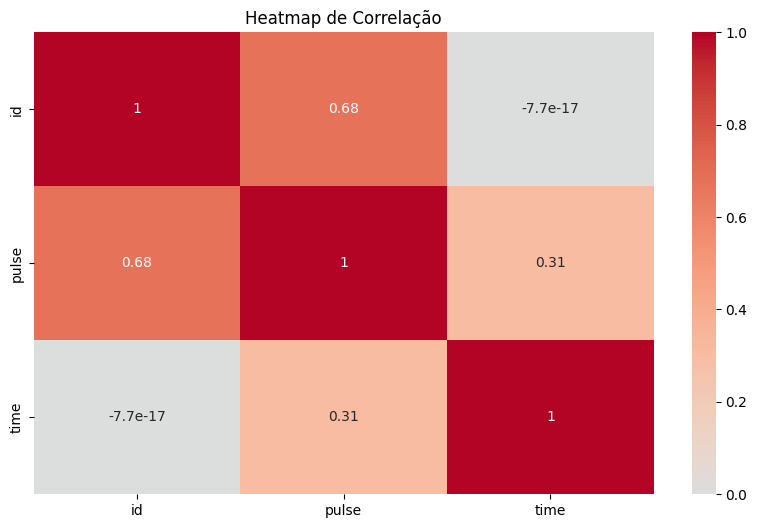

                 id     pulse          time
id     1.000000e+00  0.679012 -7.702825e-17
pulse  6.790116e-01  1.000000  3.104076e-01
time  -7.702825e-17  0.310408  1.000000e+00


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset de exercício, ignorando a coluna 'Unnamed: 0'
exercise = sns.load_dataset("exercise").drop(columns=['Unnamed: 0'])

# Converter a coluna 'time' para numérica (em minutos)
exercise['time'] = exercise['time'].str.replace(' min', '').astype(int)

# Remover colunas categóricas para calcular a matriz de correlação
exercise_numeric = exercise.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação para variáveis numéricas
correlation_matrix = exercise_numeric.corr()

# Plotar um heatmap para visualizar as correlações
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação')
plt.show()

# Exibir a matriz de correlação
print(correlation_matrix)


# Interpretação do Gráfico de Barras:
**Sobreposição de Barras:** Se as barras para *Low Fat* e *High Fat* têm alturas substancialmente semelhantes, isso sugere que a dieta pode não ter um impacto significativo na taxa de pulso.

**Altura das Barras:** A altura de cada barra representa a média da taxa de pulso para cada tipo de dieta.

**Diferença Clara nas Barras:** Se houver uma diferença clara na altura das barras, como diferentes médias de taxas de pulso, isso pode indicar que a dieta tem um impacto mensurável na taxa de pulso.

Por exemplo, se a média da taxa de pulso for consistentemente mais alta para uma dieta específica, podemos inferir que essa dieta está afetando a taxa de pulso dos participantes.

<ipython-input-3-f7b8fbae040d>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_pulse_by_diet = exercise.groupby('diet')['pulse'].mean().reset_index()
<ipython-input-3-f7b8fbae040d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_pulse_by_diet, x='diet', y='pulse', palette='Set2')


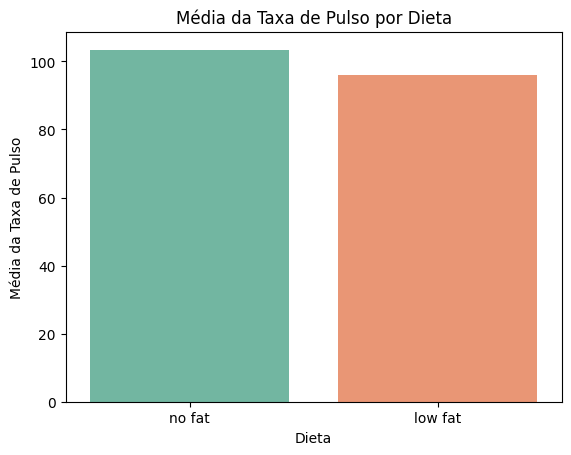

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset de exercício
exercise = sns.load_dataset("exercise")

# Calcular a média do pulso por dieta
average_pulse_by_diet = exercise.groupby('diet')['pulse'].mean().reset_index()

# Plotar um gráfico de barras para mostrar a média do pulso por dieta
sns.barplot(data=average_pulse_by_diet, x='diet', y='pulse', palette='Set2')
plt.title('Média da Taxa de Pulso por Dieta')
plt.xlabel('Dieta')
plt.ylabel('Média da Taxa de Pulso')
plt.show()



```
#Gráfico de Dispersão
```
 Gráfico de dispersão (scatter plot) para visualizar a relação entre as duas variáveis numéricas. O gráfico é exibido utilizando matplotlib.



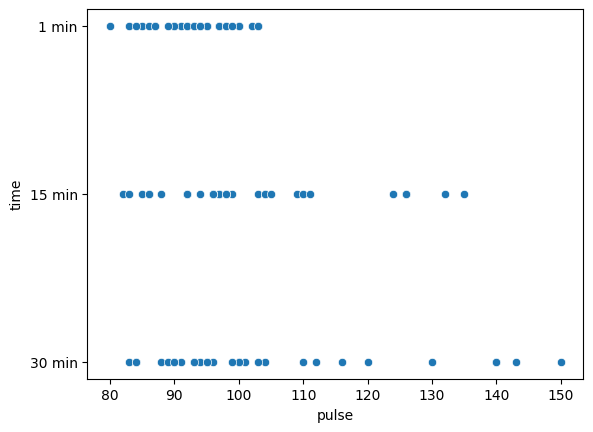

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
exercise = sns.load_dataset("exercise")

# Gerar um gráfico de dispersão com duas colunas numéricas (exemplo: 'pulse' e 'time')
sns.scatterplot(data=exercise, x="pulse", y="time")

# Exibir o gráfico
plt.show()

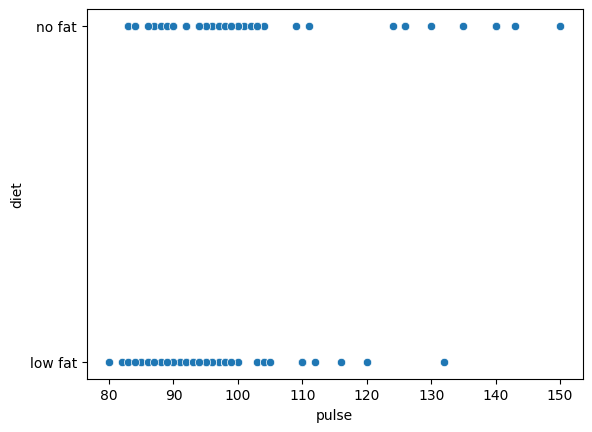

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
exercise = sns.load_dataset("exercise")

# Gerar um gráfico de dispersão com duas colunas numéricas (exemplo: 'pulse' e 'time')
sns.scatterplot(data=exercise, x="pulse", y="diet")

# Exibir o gráfico
plt.show()